Great infos on how to deal with NetCDF4 files can be found under https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

In [38]:
import netCDF4 as nc

#PATH_HYCOM = '../data/HYCOM/GLBa0_expt_91.nc4'
PATH_HYCOM = '../data/HYCOM/Water_July2014.nc4'

ds = nc.Dataset(PATH_HYCOM)


In [39]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.6 NAVO_netcdf_v1.1
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBv0.08/expt_56.3; Translation Date = 2023-09-28T11:56:54.654Z
    geospatial_lat_min: 48.0
    geospatial_lat_max: 52.0
    geospatial_lon_min: -60.0
    geospatial_lon_max: -56.0
    dimensions(sizes): time(48), depth(1), lat(101), lon(51)
    variables(dimensions): int16 water_u(time, depth, lat, lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int16 water_v(time, depth, lat, lon)
    groups: 

In [18]:
# obtenir le temps
time = ds.variables['time']
time[:].data

127037.86805555556

array([127044., 127047., 127050., 127053., 127056., 127059., 127062.,
       127065., 127071., 127074., 127077., 127080., 127083., 127086.,
       127089., 127092., 127095., 127098., 127101., 127104., 127107.,
       127110., 127113., 127116., 127119., 127122., 127125., 127128.])

In [19]:
from datetime import datetime, timedelta

dttme=datetime.strptime('2000-01-01 00:00:00', '%Y-%m-%d %H:%M:%S') + timedelta(hours=127128)
dttme2=datetime.strftime(dttme, "%Y-%m-%d %H:%M:%S")
print(dttme2)

2014-07-03 00:00:00


In [20]:
ds.variables['time'].units
# Toutes les 3h


'hours since 2000-01-01 00:00:00'

In [21]:
ds.variables['water_u'].units
# Toutes les 3h


'm/s'

In [22]:
lat, lon = ds.variables['lat'], ds.variables['lon']

#print(lat[:])
print(lon[:])


[-62.         -61.91998291 -61.84002686 -61.76000977 -61.67999268
 -61.59997559 -61.52001953 -61.44000244 -61.35998535 -61.2800293
 -61.20001221 -61.11999512 -61.03997803 -60.96002197 -60.88000488
 -60.79998779 -60.7199707  -60.64001465 -60.55999756 -60.47998047
 -60.40002441 -60.32000732 -60.23999023 -60.15997314 -60.08001709
 -60.         -59.91998291 -59.84002686 -59.76000977 -59.67999268
 -59.59997559 -59.52001953 -59.44000244 -59.35998535 -59.2800293
 -59.20001221 -59.11999512 -59.03997803 -58.96002197 -58.88000488
 -58.79998779 -58.7199707  -58.64001465 -58.55999756 -58.47998047
 -58.40002441 -58.32000732 -58.23999023 -58.15997314 -58.08001709
 -58.        ]


In [23]:
water_u = ds.variables['water_u']
water_v = ds.variables['water_v']


In [24]:
# obtenir le temps
depth = ds.variables['depth']
depth[:].data

array([0.])

<class 'numpy.ndarray'>


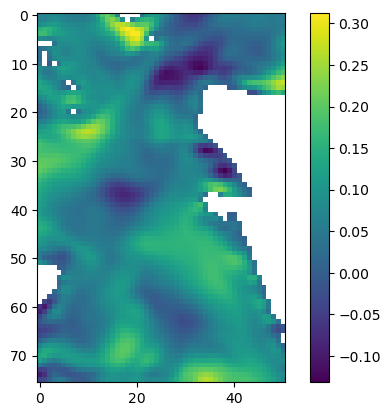

In [26]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data_first_day = np.array(water_u[10,0,:,:])
print(type(data_first_day))
#data_first_day[data_first_day == '--'] = np.nan
data_with_nan = np.where(data_first_day == -30000, np.nan, data_first_day)
#data_masked = np.ma.masked_where(data_first_day == '--', data_first_day)
plt.imshow(data_with_nan, interpolation = 'none')
plt.colorbar()

# 127037.86805555556 48.02107 -60.52054

(array([[ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 67.],
        [11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 65.],
        [ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 69.],
        [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 70.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 75.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 75.],
        [ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 74.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  

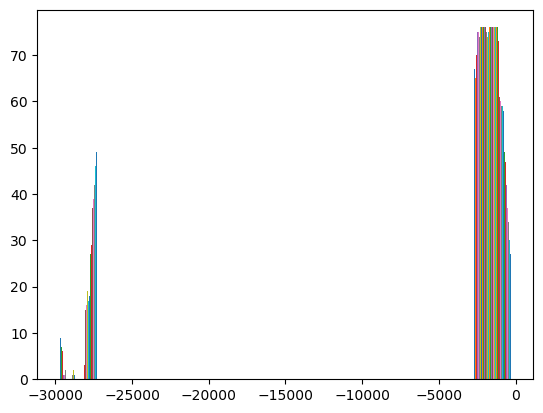

In [27]:
plt.hist(data_first_day)

In [28]:
import numpy as np

x, y = np.meshgrid(list(lon),list(lat)) 

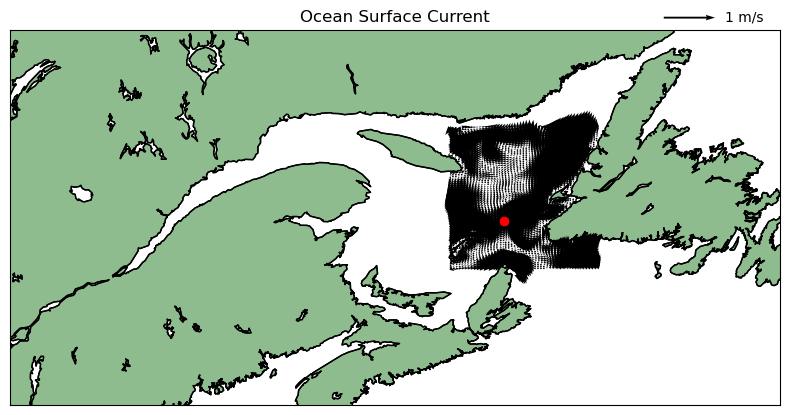

In [37]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# setting the size of the map
fig,ax = plt.subplots(figsize=(8,5))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 45.5, urcrnrlat = 47.58, llcrnrlon = -63.8, urcrnrlon = -60.9, resolution = 'i')

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)

Q = ax.quiver(x_, y_, water_u[3,0,:,:], water_v[23,0,:,:]) #, scale=5, width = 0.005) 
qk = ax.quiverkey(Q, X=0.9, Y=0.9, U=1,label=r'1 m/s', labelpos='E', coordinates = 'figure')
m.scatter(-60.5254,48.02107,latlon=True,c='r',marker='o')
#127037.86805555556 48.02107 -60.52054
#plt.legend(loc = 'lower right',framealpha=1)
plt.title('Ocean Surface Current')
plt.tight_layout()
plt.show()


In [30]:
from utils.read_data import water_interpolated
water_u_interpolation, water_v_interpolation = water_interpolated(PATH_HYCOM)

In [33]:
lat_interp = np.linspace(47,50,40)
lon_interp = np.linspace(-57,-62,80)

lon_msh, lat_msh = np.meshgrid(lon_interp, lat_interp)

lon_msh, lat_msh = lon_msh.flatten(), lat_msh.flatten()

u10_interp = np.zeros(len(lon_msh))
v10_interp = np.zeros(len(lon_msh))

for i in range(len(lon_msh)):
    u10_interp[i] = water_u_interpolation([time[3],0, lat_msh[i], lon_msh[i]])
    v10_interp[i] = water_v_interpolation([time[3],0, lat_msh[i], lon_msh[i]])



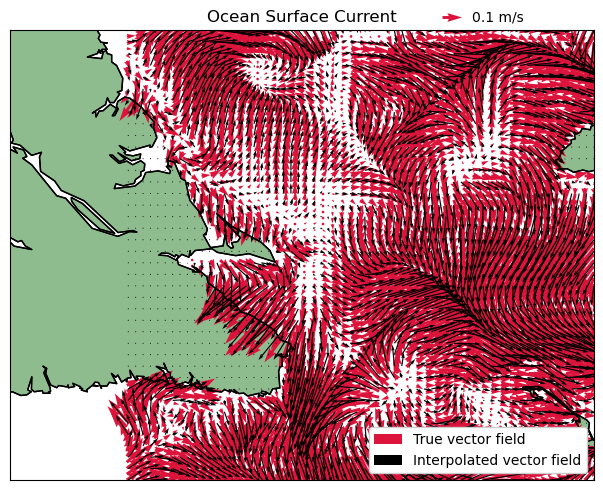

In [34]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# setting the size of the map
fig,ax = plt.subplots(figsize=(8,5))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 47, urcrnrlat = 50, llcrnrlon = -57, urcrnrlon = -62, resolution = 'i')

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)
x_interp,y_interp = m(lon_msh,lat_msh)


Q = ax.quiver(x_, y_, water_u[3,0,:,:], water_v[3,0,:,:], scale=3, width = 0.005,color='crimson', label='True vector field') 
Q2 = ax.quiver(x_interp,y_interp, u10_interp, v10_interp, scale=3, width = 0.002, color='k', label='Interpolated vector field')

qk = ax.quiverkey(Q, X=0.7, Y=0.955, U=0.1,label=r'0.1 m/s', labelpos='E', coordinates = 'figure')

plt.legend(loc = 'lower right',framealpha=1)

plt.title('Ocean Surface Current')
plt.tight_layout()
plt.show()
